In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [146]:
# 데이터 로드
df = pd.read_csv('/ml/data/BankChurners.csv')

In [147]:
# 데이터 구조 및 기초 통계 확인
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [149]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [150]:
# 결측치 탐색
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

C:\Users\njy01\AppData\Local\Temp\ipykernel_14700\790354204.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


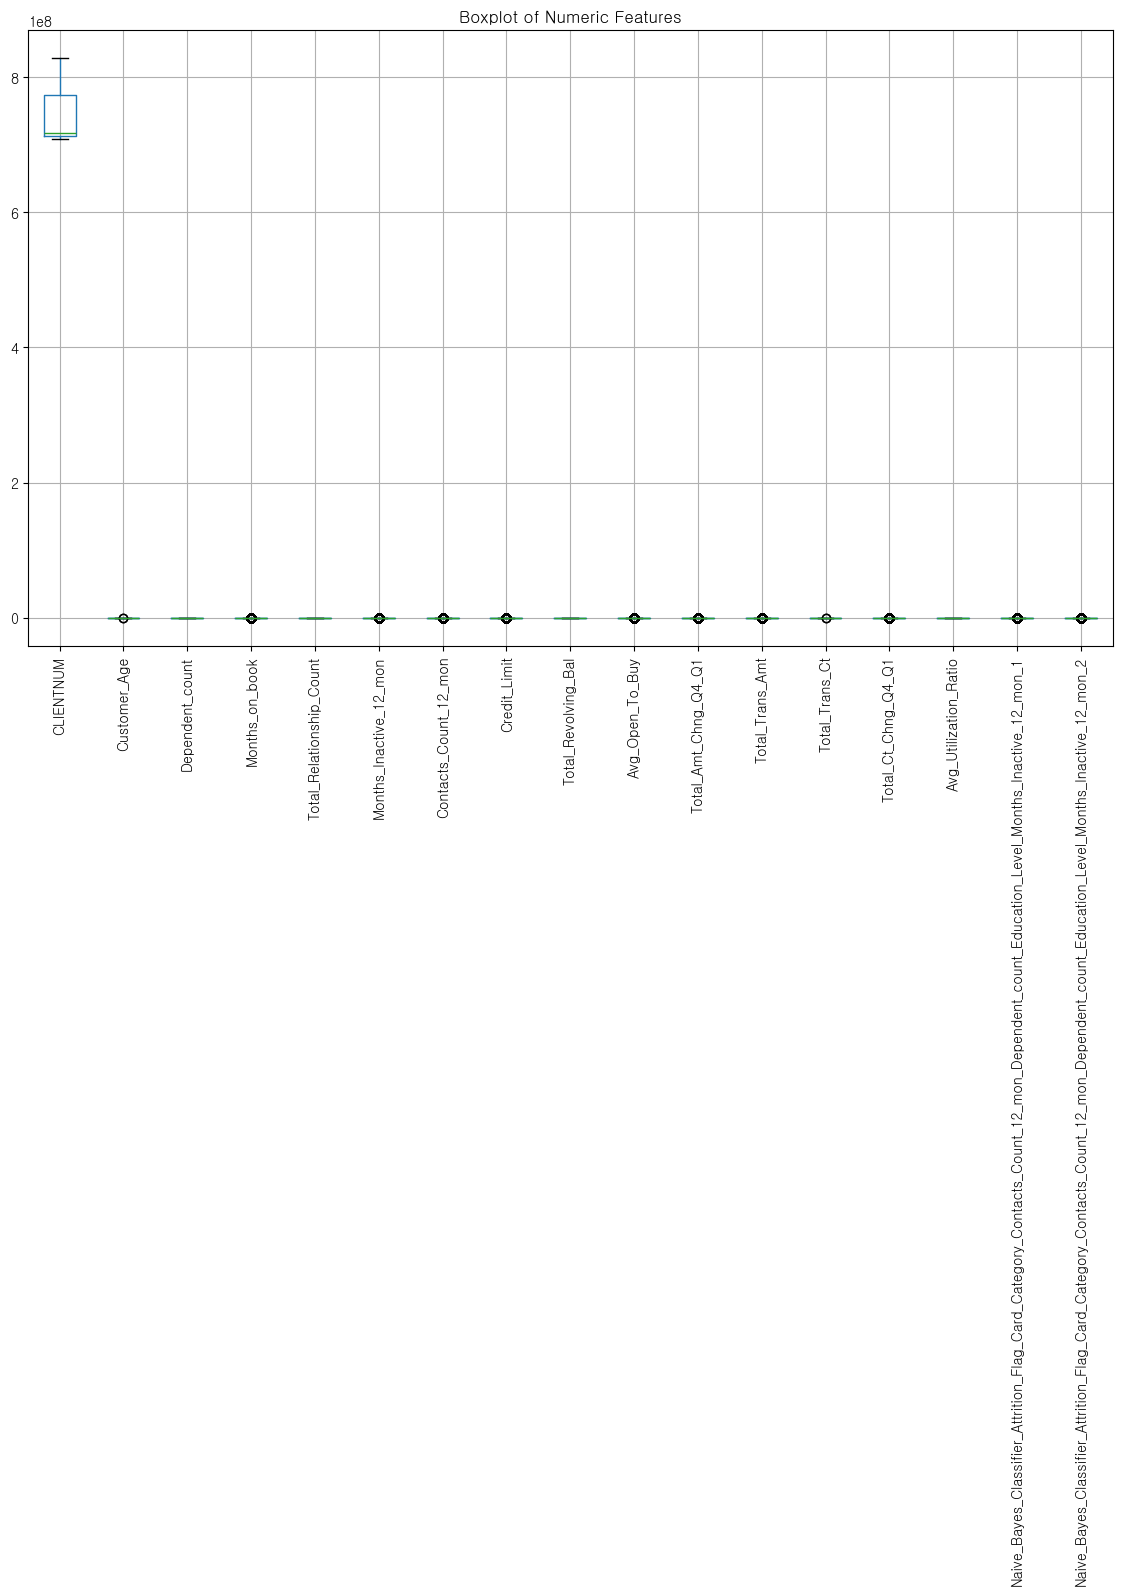

In [151]:
# 이상치 탐색
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14, 8))
df[numeric_columns].boxplot(rot=90)
plt.title('Boxplot of Numeric Features')
plt.grid(True)
plt.tight_layout()
plt.show()

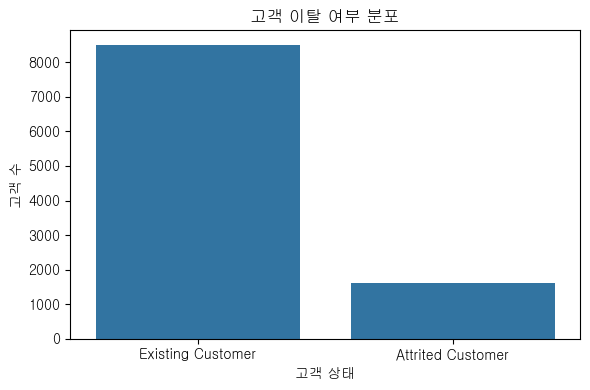

In [152]:
# 타겟 변수 분포 시각화
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition_Flag')
plt.title('고객 이탈 여부 분포')
plt.xlabel('고객 상태')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

### 인사이트 도출: 기본 고객 정보-고객 이탈
- Gender (성별)
- Education_Level (교육 수준)
- Marital_Status (결혼 여부)
- Income_Category (소득 수준)
- Card_Category (카드 등급)

##### Gender(성별)

In [153]:
# 교차표 생성
gender_churn = pd.crosstab(df['Gender'], df['Attrition_Flag']).sort_index(axis=1)

# 비율 교차표 생성
gender_churn_ratio = pd.crosstab(df['Gender'], df['Attrition_Flag'], normalize='index').sort_index(axis=1)

gender_churn_summary = pd.concat([gender_churn, gender_churn_ratio], axis=1)
gender_churn_summary.columns = ['이탈 고객 수', '기존 고객 수', '이탈 고객 비율', '기존 고객 비율']
gender_churn_summary


,이탈 고객 수,기존 고객 수,이탈 고객 비율,기존 고객 비율
Gender,,,,
F,930,4428,0.173572,0.826428
M,697,4072,0.146152,0.853848


<Figure size 600x500 with 0 Axes>

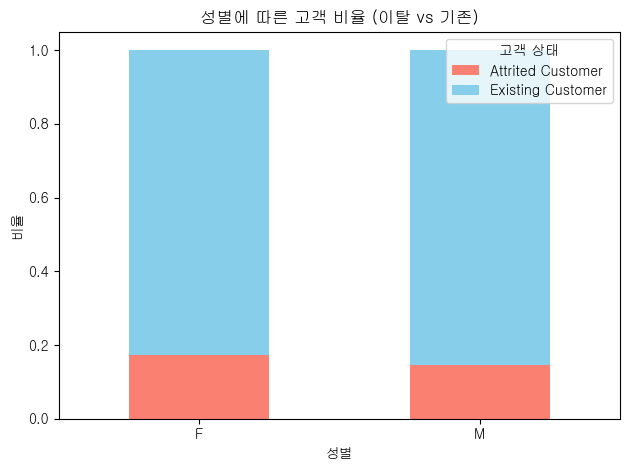

In [ ]:
plt.figure(figsize=(6, 5))
gender_churn_ratio.plot(
    kind='bar',
    stacked=True,
    color=['salmon', 'skyblue']
)

plt.title('성별에 따른 고객 비율 (이탈 vs 기존)')
plt.ylabel('비율')
plt.xlabel('성별')
plt.legend(title='고객 상태')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Education_Level (교육 수준)

In [155]:
# 교육 수준을 학력 순서대로 재정렬
edu_order = [
    'Uneducated',
    'High School',
    'College',
    'Graduate',
    'Post-Graduate',
    'Doctorate',
    'Unknown'
]

# 교차표 생성
edu_churn = pd.crosstab(df['Education_Level'], df['Attrition_Flag'])

# 비율 교차표 생성
edu_churn_ratio = pd.crosstab(df['Education_Level'], df['Attrition_Flag'], normalize='index')

edu_churn_summary = pd.concat([edu_churn, edu_churn_ratio], axis=1)
edu_churn_summary.columns = ['이탈 고객 수', '기존 고객 수', '이탈 고객 비율', '기존 고객 비율']

# 행 인덱스 재정렬
edu_churn_summary = edu_churn_summary.loc[edu_order]
edu_churn_summary

,이탈 고객 수,기존 고객 수,이탈 고객 비율,기존 고객 비율
Education_Level,,,,
Uneducated,237,1250,0.159381,0.840619
High School,306,1707,0.152012,0.847988
College,154,859,0.152024,0.847976
Graduate,487,2641,0.155691,0.844309
Post-Graduate,92,424,0.178295,0.821705
Doctorate,95,356,0.210643,0.789357
Unknown,256,1263,0.168532,0.831468


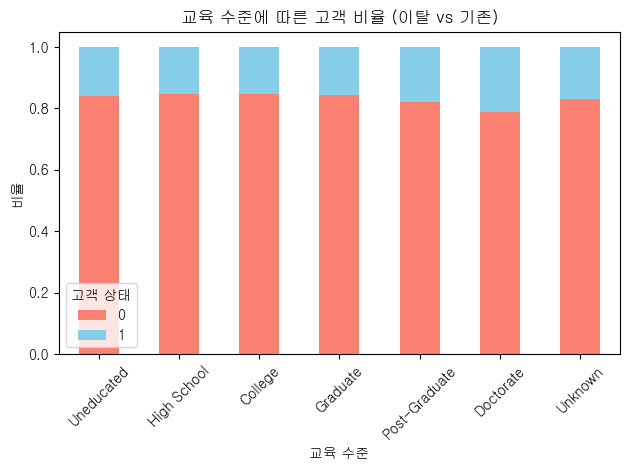

In [202]:
edu_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']

edu_ratio = pd.crosstab(df['Education_Level'], df['Attrition_Flag'], normalize='index')
edu_ratio = edu_ratio.loc[edu_order]

edu_ratio.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.title('교육 수준에 따른 고객 비율 (이탈 vs 기존)')
plt.ylabel('비율')
plt.xlabel('교육 수준')
plt.xticks(rotation=45)
plt.legend(title='고객 상태')
plt.tight_layout()
plt.show()

#### Marital_Status (결혼 여부)

In [157]:
# 교차표 생성
marital_churn = pd.crosstab(df['Marital_Status'], df['Attrition_Flag'])

# 비율 교차표 생성
marital_churn_ratio = pd.crosstab(df['Marital_Status'], df['Attrition_Flag'], normalize='index')

marital_churn_summary = pd.concat([marital_churn, marital_churn_ratio], axis=1)
marital_churn_summary.columns = ['이탈 고객 수', '기존 고객 수', '이탈 고객 비율', '기존 고객 비율']
marital_churn_summary

,이탈 고객 수,기존 고객 수,이탈 고객 비율,기존 고객 비율
Marital_Status,,,,
Divorced,121,627,0.161765,0.838235
Married,709,3978,0.151269,0.848731
Single,668,3275,0.169414,0.830586
Unknown,129,620,0.172230,0.827770


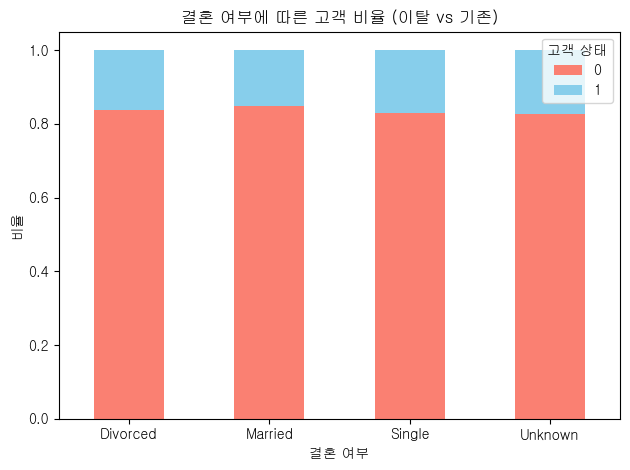

In [201]:
marital_ratio = pd.crosstab(df['Marital_Status'], df['Attrition_Flag'], normalize='index')
marital_ratio.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.title('결혼 여부에 따른 고객 비율 (이탈 vs 기존)')
plt.ylabel('비율')
plt.xlabel('결혼 여부')
plt.xticks(rotation=0)
plt.legend(title='고객 상태')
plt.tight_layout()
plt.show()

##### Income_Category (소득 수준)

In [179]:
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

income_churn_summary_sorted = income_churn_summary.loc[income_order]
income_churn_summary_sorted

,이탈 고객 수,기존 고객 수,이탈 고객 비율,기존 고객 비율
Income_Category,,,,
Less than $40K,612,2949,0.171862,0.828138
$40K - $60K,271,1519,0.151397,0.848603
$60K - $80K,189,1213,0.134807,0.865193
$80K - $120K,242,1293,0.157655,0.842345
$120K +,126,601,0.173315,0.826685
Unknown,187,925,0.168165,0.831835


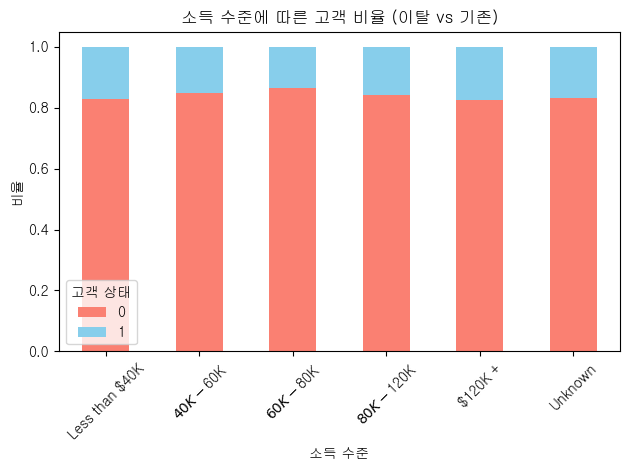

In [203]:
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

income_ratio = pd.crosstab(df['Income_Category'], df['Attrition_Flag'], normalize='index')
income_ratio = income_ratio.loc[income_order]

income_ratio.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.title('소득 수준에 따른 고객 비율 (이탈 vs 기존)')
plt.ylabel('비율')
plt.xlabel('소득 수준')
plt.xticks(rotation=45)
plt.legend(title='고객 상태')
plt.tight_layout()
plt.show()


##### Card_Category (카드 등급)

In [181]:
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']

card_churn_summary_sorted = card_churn_summary.loc[card_order]
card_churn_summary_sorted

,이탈 고객 수,기존 고객 수,이탈 고객 비율,기존 고객 비율
Card_Category,,,,
Blue,1519,7917,0.160979,0.839021
Silver,82,473,0.147748,0.852252
Gold,21,95,0.181034,0.818966
Platinum,5,15,0.250000,0.750000


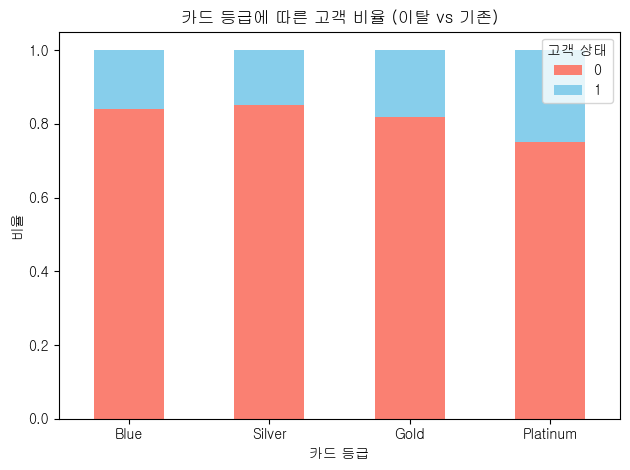

In [204]:
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']

card_ratio = pd.crosstab(df['Card_Category'], df['Attrition_Flag'], normalize='index')
card_ratio = card_ratio.loc[card_order]

card_ratio.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.title('카드 등급에 따른 고객 비율 (이탈 vs 기존)')
plt.ylabel('비율')
plt.xlabel('카드 등급')
plt.xticks(rotation=0)
plt.legend(title='고객 상태')
plt.tight_layout()
plt.show()

# 전처리

In [163]:
# 타겟 변수 이진값으로 변환

df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

df['Attrition_Flag'].value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

##### 변수형 변수 전처리 (원-핫 인코딩)

In [164]:
# One-Hot Encoding 대상 범주형 변수 추출
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.shape

(10127, 36)

In [165]:
# X, y 분리
X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']

X.shape, y.shape

((10127, 35), (10127,))

##### 수치형 변수 전처리

In [166]:
from sklearn.preprocessing import StandardScaler

# 수치형 변수 선택
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition_Flag')

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X[numeric_cols].head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,0.802878,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,-0.437754,0.437763
1,2.156861,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,-0.437854,0.437845
2,-0.682769,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,-0.437952,0.437955
3,0.832862,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.437644,0.437654
4,-0.814896,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-0.437950,0.437955


### 모델 학습

In [167]:
from sklearn.model_selection import train_test_split

# Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

cm, pd.DataFrame(report).T

(array([[1701,    0],
        [   0,  325]], dtype=int64),
               precision  recall  f1-score  support
 0                   1.0     1.0       1.0   1701.0
 1                   1.0     1.0       1.0    325.0
 accuracy            1.0     1.0       1.0      1.0
 macro avg           1.0     1.0       1.0   2026.0
 weighted avg        1.0     1.0       1.0   2026.0)

---

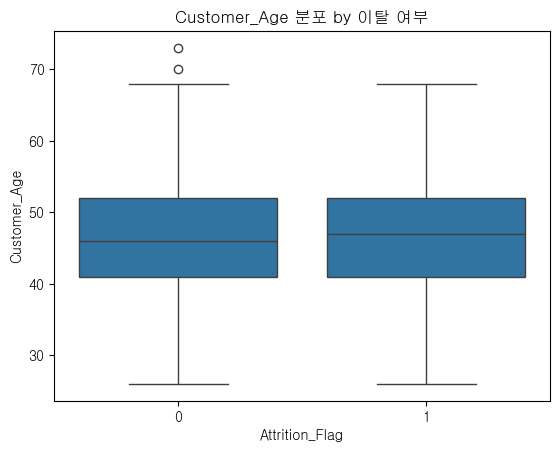

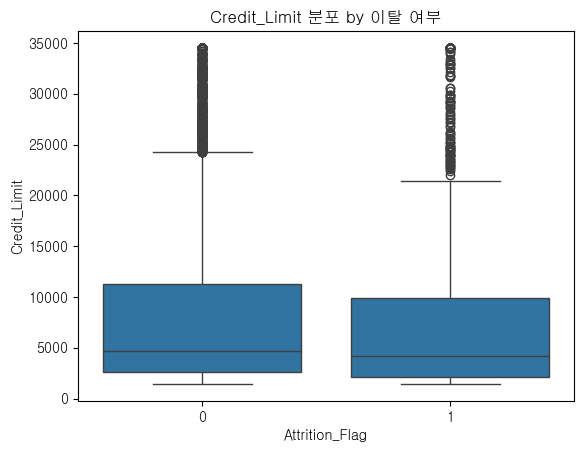

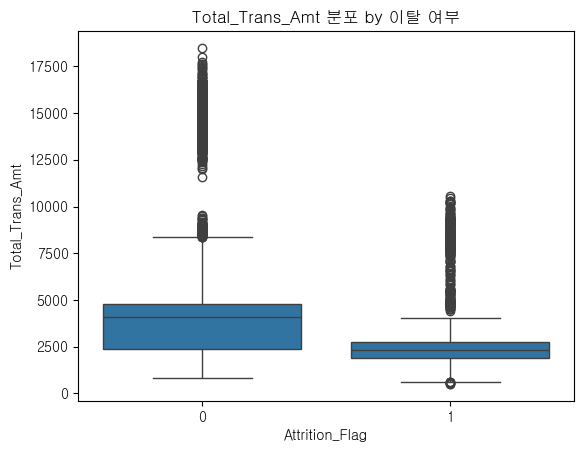

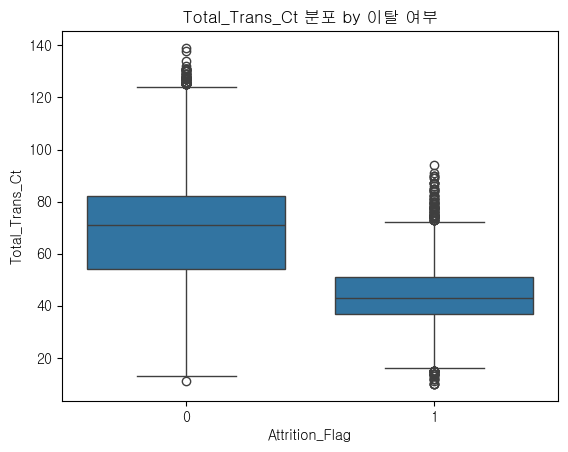

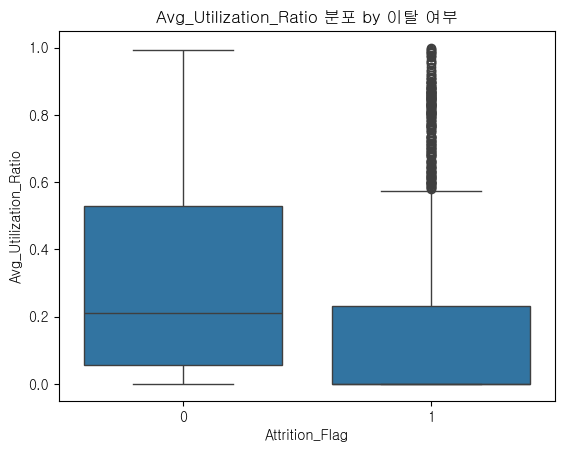

In [168]:
# 주요 변수 분포 시각화 (이탈 여부에 따라)
num_cols = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
for col in num_cols:
    sns.boxplot(data=df, y=col, x='Attrition_Flag')
    plt.title(f'{col} 분포 by 이탈 여부')
    plt.show()

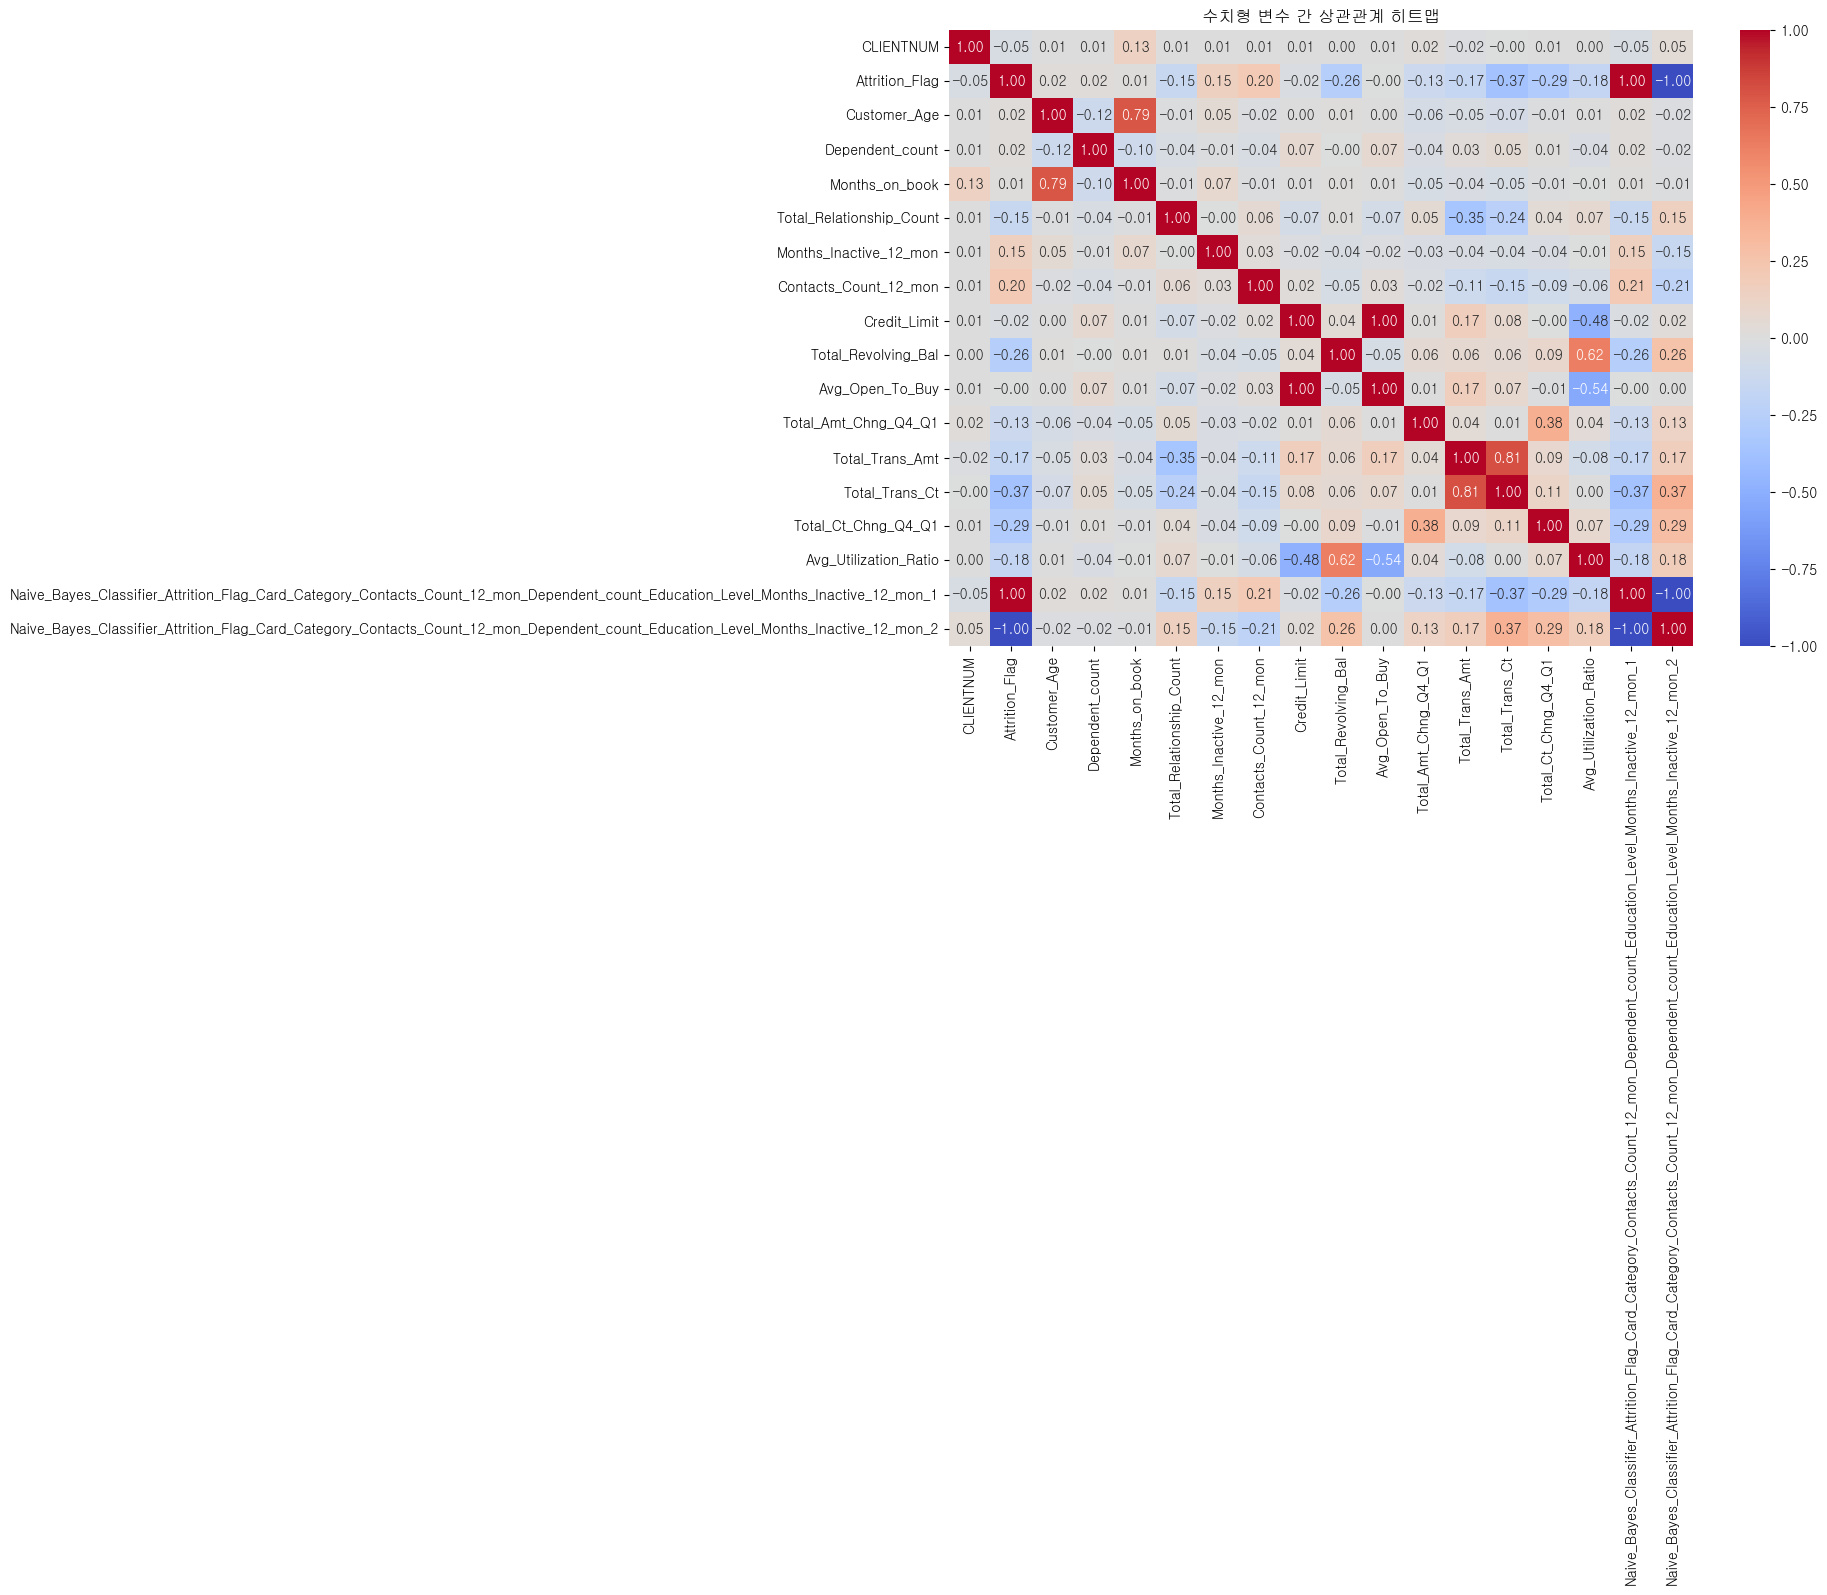

In [169]:
# 상관관계 히트맵
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('수치형 변수 간 상관관계 히트맵')
plt.show()